# Calculus for Optimization — Chapter 1: Functions




## 1. What is a Function?

A **function** is a mapping that assigns every input in a set (domain) to exactly one output in another set (codomain):

$$
f : X \rightarrow Y
$$

For real-valued functions encountered in optimization we often consider:

$$
f:\mathbb{R}^n \to \mathbb{R}\quad\text{(scalar-valued)}
$$

or

$$
\mathbf{f}:\mathbb{R}^n \to \mathbb{R}^m\quad\text{(vector-valued)}
$$

In machine learning:

- prediction function: $\hat{y}=h_{\theta}(x)$
- loss function: $J(\theta)$

Optimization is the act of minimizing (or maximizing) such functions: $\theta^*=\arg\min_\theta J(\theta)$.


## 2. Important Function Classes (used in ML/Optimization)

### Linear
$$ f(x) = m x + b $$

### Polynomial (quadratic common example)
$$ f(x) = a x^2 + b x + c $$

### Exponential
$$ f(x) = e^x $$

### Logarithm
$$ f(x) = \log x \quad (x>0) $$

### Sigmoid (logistic activation)
$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

### ReLU (rectified linear unit)
$$ \text{ReLU}(x) = \max(0,x) $$

These appear as model components (activations), loss terms, and analytic tools in optimization.


## 3. Domain, Codomain, Range

- **Domain:** set of allowed inputs.
- **Codomain:** set where outputs live.
- **Range:** actual outputs produced by the function (subset of codomain).

Example: ReLU has domain $\mathbb{R}$, codomain $\mathbb{R}$, but range $[0,\infty)$.


## 5. Scalar-valued vs Vector-valued Functions

Scalar-valued: $f:\mathbb{R}^n\to\mathbb{R}$ (e.g., loss). Vector-valued: $\mathbf{f}:\mathbb{R}^n\to\mathbb{R}^m$ (e.g., multi-output model).


In [1]:
# Standard imports for demonstrations
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
import sympy as sp
%matplotlib inline
print('Libraries loaded. Running demonstration plots below will produce figures for class.')

Libraries loaded. Running demonstration plots below will produce figures for class.


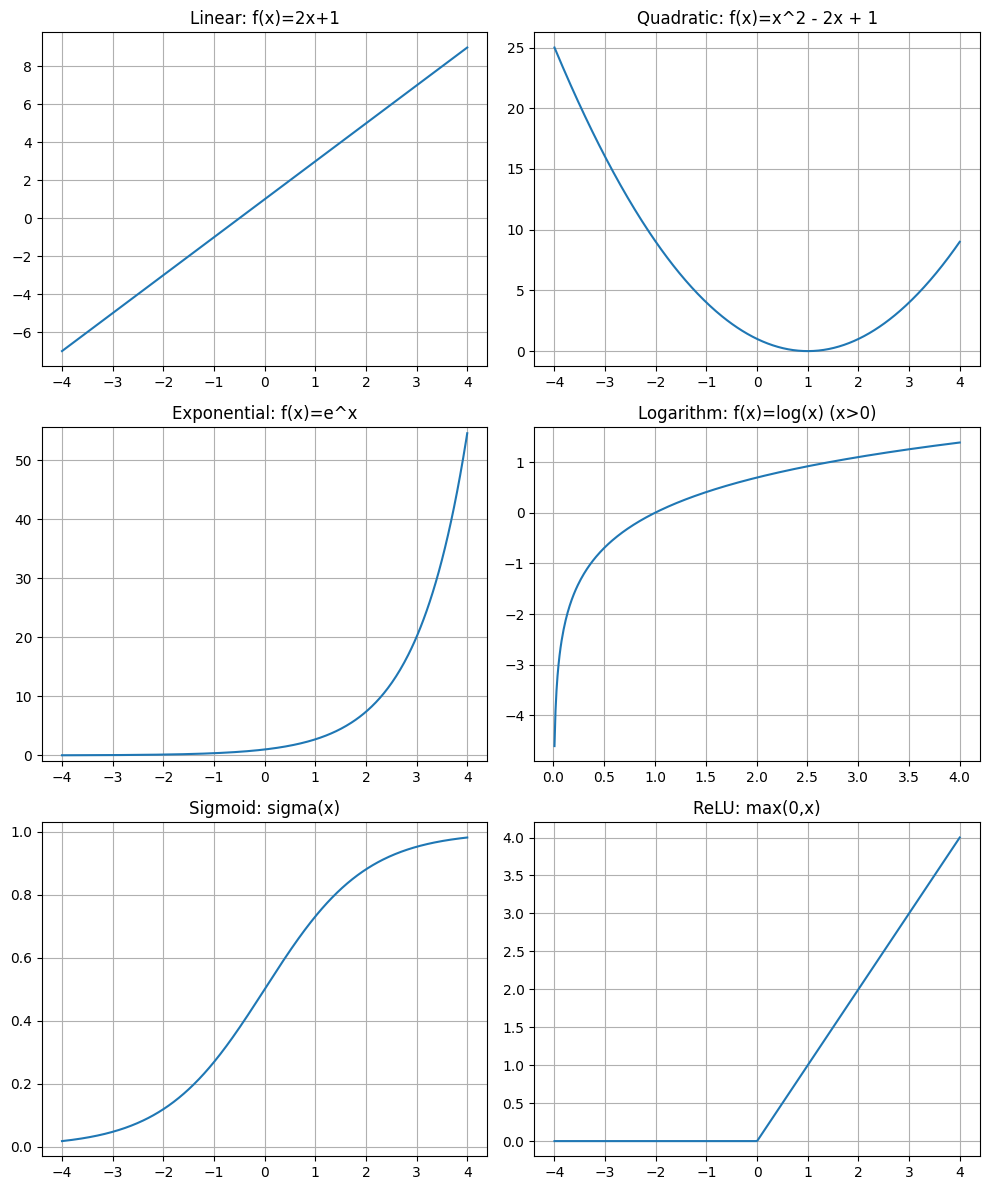

In [2]:
# Plot common 1D functions: linear, quadratic, exponential, logarithm, sigmoid, ReLU
x = np.linspace(-4, 4, 400)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.ravel()

axes[0].plot(x, 2*x + 1)
axes[0].set_title('Linear: f(x)=2x+1')
axes[0].grid(True)

axes[1].plot(x, x**2 - 2*x + 1)
axes[1].set_title('Quadratic: f(x)=x^2 - 2x + 1')
axes[1].grid(True)

axes[2].plot(x, np.exp(x))
axes[2].set_title('Exponential: f(x)=e^x')
axes[2].set_ylim([-1, np.exp(4)+1])
axes[2].grid(True)

# logarithm: restrict domain > 0
x_pos = np.linspace(0.01, 4, 400)
axes[3].plot(x_pos, np.log(x_pos))
axes[3].set_title('Logarithm: f(x)=log(x) (x>0)')
axes[3].grid(True)

axes[4].plot(x, sigmoid(x))
axes[4].set_title('Sigmoid: sigma(x)')
axes[4].grid(True)

axes[5].plot(x, relu(x))
axes[5].set_title('ReLU: max(0,x)')
axes[5].grid(True)

plt.tight_layout()
plt.show()

## 6. Derivative — Definition and Interpretation

For a scalar function $f(x)$, the derivative at $x$ is

$$
f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}
$$

Interpretation: instantaneous rate of change. In optimization, gradient points to direction of steepest ascent; negative gradient is steepest descent.
